In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [0]:
col_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 
             'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 
             'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
             'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 
             'num_access_files', 'num_outbound_cmds', 'is_host_login', 
             'is_guest_login', 'count', 'srv_count', 'serror_rate', 
             'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 
             'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 
             'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 
             'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
             'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 
             'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 
             'dst_host_srv_rerror_rate', 'label']
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/PCAP.csv',
                  header=None, names=col_names)

# DATA CLEANING

In [0]:
df = data.dropna()

In [0]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,311029.000000,3.110290e+05,3.110290e+05,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,...,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000
mean,17.902736,1.731702e+03,7.479937e+02,0.000029,0.000762,0.000051,0.014677,0.002363,0.172476,0.011243,...,235.282681,199.193914,0.793494,0.024953,0.547919,0.004566,0.058764,0.058791,0.142659,0.141693
std,407.644400,1.276567e+05,1.612018e+04,0.005379,0.040367,0.009821,0.312068,0.049990,0.377794,1.958325,...,60.913298,100.306470,0.387090,0.096003,0.491963,0.035773,0.231296,0.232997,0.344380,0.346573
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.050000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,244.000000,0.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,57715.000000,6.282565e+07,5.203179e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,311029.000000,3.110290e+05,3.110290e+05,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,...,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000
mean,17.902736,1.731702e+03,7.479937e+02,0.000029,0.000762,0.000051,0.014677,0.002363,0.172476,0.011243,...,235.282681,199.193914,0.793494,0.024953,0.547919,0.004566,0.058764,0.058791,0.142659,0.141693
std,407.644400,1.276567e+05,1.612018e+04,0.005379,0.040367,0.009821,0.312068,0.049990,0.377794,1.958325,...,60.913298,100.306470,0.387090,0.096003,0.491963,0.035773,0.231296,0.232997,0.344380,0.346573
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.050000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,244.000000,0.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,57715.000000,6.282565e+07,5.203179e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
df['is_host_login'].head()

0    0
1    0
2    0
3    0
4    0
Name: is_host_login, dtype: int64

In [0]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.\n
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.\n
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.\n
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.\n
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.\n


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311029 entries, 0 to 311028
Data columns (total 42 columns):
duration                       311029 non-null int64
protocol_type                  311029 non-null object
service                        311029 non-null object
flag                           311029 non-null object
src_bytes                      311029 non-null int64
dst_bytes                      311029 non-null int64
land                           311029 non-null int64
wrong_fragment                 311029 non-null int64
urgent                         311029 non-null int64
hot                            311029 non-null int64
num_failed_logins              311029 non-null int64
logged_in                      311029 non-null int64
num_compromised                311029 non-null int64
root_shell                     311029 non-null int64
su_attempted                   311029 non-null int64
num_root                       311029 non-null int64
num_file_creations             311029 

In [0]:
df['protocol_type'] = df['protocol_type'].replace('udp', '0')
df['protocol_type'] = df['protocol_type'].replace('tcp', '1')
df['protocol_type'] = df['protocol_type'].replace('icmp', '2')

In [0]:
df['service'] = df['service'].replace('private', '0')
df['service'] = df['service'].replace('domain_u', '1')
df['service'] = df['service'].replace('http', '2')
df['service'] = df['service'].replace('smtp', '3')
df['service'] = df['service'].replace('ftp_data', '4')
df['service'] = df['service'].replace('ftp', '5')
df['service'] = df['service'].replace('eco_i', '6')
df['service'] = df['service'].replace('other', '7')
df['service'] = df['service'].replace('auth', '8')
df['service'] = df['service'].replace('ecr_i', '9')
df['service'] = df['service'].replace('IRC', '10')
df['service'] = df['service'].replace('X11', '11')
df['service'] = df['service'].replace('finger', '12')
df['service'] = df['service'].replace('time', '13')
df['service'] = df['service'].replace('domain', '14')
df['service'] = df['service'].replace('telnet', '15')
df['service'] = df['service'].replace('pop_3', '16')
df['service'] = df['service'].replace('ldap', '17')
df['service'] = df['service'].replace('login', '18')
df['service'] = df['service'].replace('name', '19')
df['service'] = df['service'].replace('ntp_u', '20')
df['service'] = df['service'].replace('http_443', '21')
df['service'] = df['service'].replace('sunrpc', '22')
df['service'] = df['service'].replace('printer', '23')
df['service'] = df['service'].replace('systat', '24')
df['service'] = df['service'].replace('tim_i', '25')
df['service'] = df['service'].replace('netstat', '26')
df['service'] = df['service'].replace('remote_job', '27')
df['service'] = df['service'].replace('link', '28')
df['service'] = df['service'].replace('urp_i', '29')
df['service'] = df['service'].replace('sql_net', '30')
df['service'] = df['service'].replace('bgp', '31')
df['service'] = df['service'].replace('pop_2', '32')
df['service'] = df['service'].replace('tftp_u', '33')
df['service'] = df['service'].replace('uucp', '34')
df['service'] = df['service'].replace('imap4', '35')
df['service'] = df['service'].replace('pm_dump', '36')
df['service'] = df['service'].replace('nnsp', '37')
df['service'] = df['service'].replace('courier', '38')
df['service'] = df['service'].replace('daytime', '39')
df['service'] = df['service'].replace('iso_tsap', '40')
df['service'] = df['service'].replace('echo', '41')
df['service'] = df['service'].replace('discard', '42')
df['service'] = df['service'].replace('ssh', '43')
df['service'] = df['service'].replace('whois', '44')
df['service'] = df['service'].replace('mtp', '45')
df['service'] = df['service'].replace('gopher', '46')
df['service'] = df['service'].replace('rje', '47')
df['service'] = df['service'].replace('ctf', '48')
df['service'] = df['service'].replace('supdup', '49')
df['service'] = df['service'].replace('hostnames', '50')
df['service'] = df['service'].replace('csnet_ns', '51')
df['service'] = df['service'].replace('uucp_path', '52')
df['service'] = df['service'].replace('nntp', '53')
df['service'] = df['service'].replace('netbios_ns', '54')
df['service'] = df['service'].replace('netbios_dgm', '55')
df['service'] = df['service'].replace('netbios_ssn', '56')
df['service'] = df['service'].replace('vmnet', '57')
df['service'] = df['service'].replace('Z39_50', '58')
df['service'] = df['service'].replace('exec', '59')
df['service'] = df['service'].replace('shell', '60')
df['service'] = df['service'].replace('efs', '61')
df['service'] = df['service'].replace('klogin', '62')
df['service'] = df['service'].replace('kshell', '63')
df['service'] = df['service'].replace('icmp', '64')

In [0]:
df['flag'] = df['flag'].replace('SF', '0')
df['flag'] = df['flag'].replace('SH', '1')
df['flag'] = df['flag'].replace('RSTR', '2')
df['flag'] = df['flag'].replace('REJ', '3')
df['flag'] = df['flag'].replace('S0', '4')
df['flag'] = df['flag'].replace('S1', '5')
df['flag'] = df['flag'].replace('S2', '6')
df['flag'] = df['flag'].replace('S3', '7')
df['flag'] = df['flag'].replace('RSTO', '8')
df['flag'] = df['flag'].replace('RSTOS0', '9')
df['flag'] = df['flag'].replace('OTH', '10')

In [0]:
df['label'] = df['label'].replace(['back.\n', 'land.\n', 'neptune.\n', 'pod.\n', 
                                   'smurf.\n', 'teardrop.\n', 'apache2.\n', 
                                   'udpstorm.\n','processtable.\n', 'worm.\n'], 
                                   '1') 
#10 DoS

df['label'] = df['label'].replace(['satan.\n', 'ipsweep.\n', 'nmap.\n', 
                                   'portsweep.\n', 'mscan.\n', 'saint.\n'], 
                                   '2') 
#6 Probe

df['label'] = df['label'].replace(['guess_passwd.\n', 'ftp_write.\n', 'imap.\n', 
                                   'phf.\n', 'multihop.\n', 'warezmaster.\n', 
                                   'warezclient.\n', 'spy.\n', 'xlock.\n', 
                                   'xsnoop.\n', 'snmpguess.\n', 
                                   'snmpgetattack.\n', 'httptunnel.\n', 
                                   'sendmail.\n', 'named.\n', 'mailbomb.\n'], 
                                   '3') 
#16 R2L

df['label'] = df['label'].replace(['buffer_overflow.\n', 'loadmodule.\n', 
                                   'rootkit.\n', 'perl.\n', 'sqlattack.\n', 
                                   'xterm.\n', 'ps.\n'], '4') 
#7 U2R

df['label'] = df['label'].replace('normal.\n', '0')
#1 Normal

In [0]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,0,0,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
1,0,0,0,0,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
2,0,0,0,0,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
3,0,0,0,0,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,3
4,0,0,0,0,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,3


In [0]:
df["protocol_type"] = pd.to_numeric(df["protocol_type"])
df["service"] = pd.to_numeric(df["service"])
df["flag"]= pd.to_numeric(df["flag"])
df["label"] = pd.to_numeric(df["label"])

In [0]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,0,0,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
1,0,0,0,0,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
2,0,0,0,0,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
3,0,0,0,0,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,3
4,0,0,0,0,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,3


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311029 entries, 0 to 311028
Data columns (total 42 columns):
duration                       311029 non-null int64
protocol_type                  311029 non-null int64
service                        311029 non-null int64
flag                           311029 non-null int64
src_bytes                      311029 non-null int64
dst_bytes                      311029 non-null int64
land                           311029 non-null int64
wrong_fragment                 311029 non-null int64
urgent                         311029 non-null int64
hot                            311029 non-null int64
num_failed_logins              311029 non-null int64
logged_in                      311029 non-null int64
num_compromised                311029 non-null int64
root_shell                     311029 non-null int64
su_attempted                   311029 non-null int64
num_root                       311029 non-null int64
num_file_creations             311029 non

In [0]:
data = df.drop('label', axis=1)
label = pd.DataFrame(df['label'])
X_train, X_test, y_train, y_test = train_test_split(data, label,test_size=0.2)
df.to_csv("/content/drive/My Drive/Colab Notebooks/Datasets/clean_labeled.csv", 
          index=False)
X_train.to_csv("/content/drive/My Drive/Colab Notebooks/Datasets/train_data.csv", 
           index=False)
y_train.to_csv("/content/drive/My Drive/Colab Notebooks/Datasets/train_label.csv", 
           index=False)
X_test.to_csv("/content/drive/My Drive/Colab Notebooks/Datasets/test_data.csv", 
           index=False)
y_test.to_csv("/content/drive/My Drive/Colab Notebooks/Datasets/test_label.csv", 
           index=False)

# VISUALISATION

In [0]:
#0 -> Normal
#1 -> DoS
#2 -> Probe
#3 -> R2L
#4 -> U2R
df['label'].value_counts()

1    224855
0     60593
3     21345
2      4166
4        70
Name: label, dtype: int64

<Figure size 576x396 with 0 Axes>

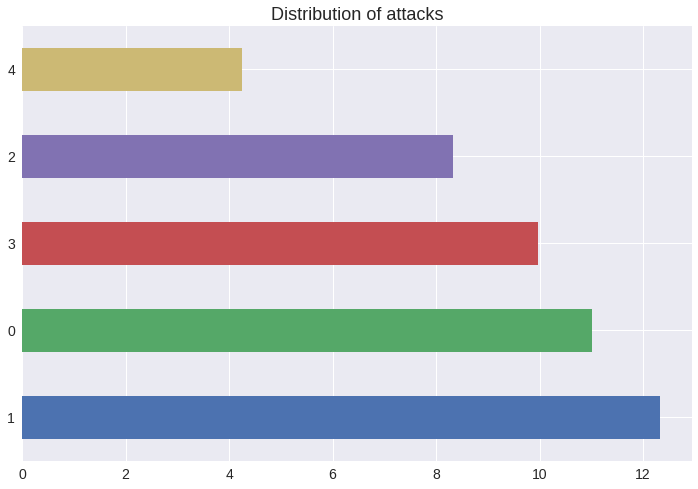

In [0]:
plt.clf()
plt.figure(figsize=(12, 8))
params = {'axes.titlesize':'18',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
matplotlib.rcParams.update(params)
plt.title('Distribution of attacks')
#df.plot(kind='barh')
df['label'].value_counts().apply(np.log).plot(kind='barh')

plt.show()

In [0]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248823 entries, 285809 to 45391
Data columns (total 41 columns):
duration                       248823 non-null int64
protocol_type                  248823 non-null int64
service                        248823 non-null int64
flag                           248823 non-null int64
src_bytes                      248823 non-null int64
dst_bytes                      248823 non-null int64
land                           248823 non-null int64
wrong_fragment                 248823 non-null int64
urgent                         248823 non-null int64
hot                            248823 non-null int64
num_failed_logins              248823 non-null int64
logged_in                      248823 non-null int64
num_compromised                248823 non-null int64
root_shell                     248823 non-null int64
su_attempted                   248823 non-null int64
num_root                       248823 non-null int64
num_file_creations             248823

In [0]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248823 entries, 285809 to 45391
Data columns (total 1 columns):
label    248823 non-null int64
dtypes: int64(1)
memory usage: 3.8 MB


In [0]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62206 entries, 269674 to 260975
Data columns (total 41 columns):
duration                       62206 non-null int64
protocol_type                  62206 non-null int64
service                        62206 non-null int64
flag                           62206 non-null int64
src_bytes                      62206 non-null int64
dst_bytes                      62206 non-null int64
land                           62206 non-null int64
wrong_fragment                 62206 non-null int64
urgent                         62206 non-null int64
hot                            62206 non-null int64
num_failed_logins              62206 non-null int64
logged_in                      62206 non-null int64
num_compromised                62206 non-null int64
root_shell                     62206 non-null int64
su_attempted                   62206 non-null int64
num_root                       62206 non-null int64
num_file_creations             62206 non-null int64
n

In [0]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62206 entries, 269674 to 260975
Data columns (total 1 columns):
label    62206 non-null int64
dtypes: int64(1)
memory usage: 972.0 KB
